In [ ]:
import skimage
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
from skimage import data

In [ ]:
camera = data.camera()

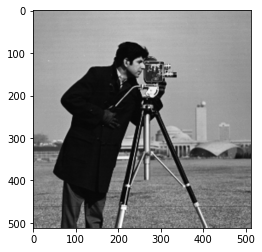

In [ ]:
plt.imshow(camera,cmap='gray')

In [ ]:
camera.shape

(512, 512)

In [ ]:
coins = data.coins()
from skimage import filters
threshold_value = filters.threshold_otsu(a1)
threshold_value

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (485, 862, 3) looks like an RGB image
  This is separate from the ipykernel package so we can avoid doing imports until


129

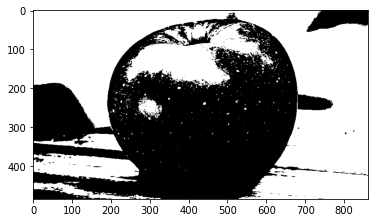

In [ ]:
plt.imshow(a1>0.5114517126225491,cmap='gray')

In [ ]:
from skimage import io

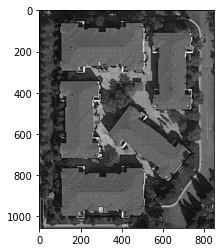

In [ ]:
s1 = io.imread('s1.jpg',as_gray=True)
plt.imshow(s1,cmap='gray')

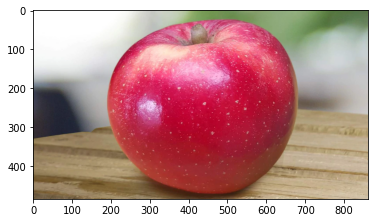

In [ ]:
a1 = io.imread('a1.jpg',as_gray=False)
plt.imshow(a1)

In [ ]:
nrows, ncols = camera.shape
row, col = np.ogrid[:nrows, :ncols]
cnt_row, cnt_col = nrows / 2, ncols / 2
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 >
                   (nrows / 2)**2)
camera[outer_disk_mask] = 0

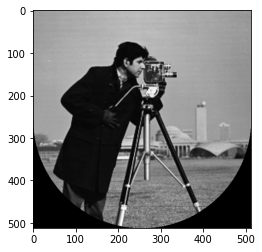

In [ ]:
lower_half = row > cnt_row
lower_half_disk = np.logical_and(lower_half, outer_disk_mask)
camera = data.camera()
camera[lower_half_disk] = 0
plt.imshow(camera,cmap='gray')

In [ ]:
row.shape,col.shape

((512, 1), (1, 512))

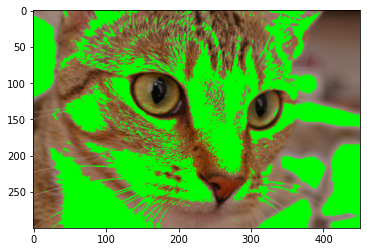

In [ ]:
from skimage import data
cat = data.chelsea()
reddish = cat[:, :, 0] > 160
cat[reddish] = [0, 255, 0]
plt.imshow(cat)

In [ ]:
cat.shape

(300, 451, 3)

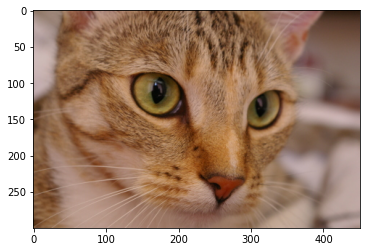

In [ ]:
plt.imshow(data.chelsea())

In [ ]:
im3d = np.random.rand(100, 1000, 1000)
from skimage import morphology
from scipy import ndimage as ndi
seeds = ndi.label(im3d < 0.1)[0]
ws = morphology.watershed(im3d, seeds)

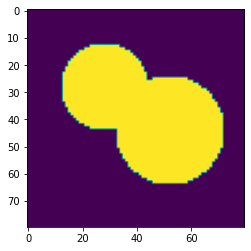

In [ ]:
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1)**2 + (y - y1)**2 < r1**2
mask_circle2 = (x - x2)**2 + (y - y2)**2 < r2**2
image = np.logical_or(mask_circle1, mask_circle2)
plt.imshow(image)

In [ ]:
from scipy import ndimage as ndi
distance = ndi.distance_transform_edt(image)
from skimage.feature import peak_local_max
local_maxi = peak_local_max(distance, labels=image,
                             footprint=np.ones((3, 3)),
                             indices=False)
markers = ndi.label(local_maxi)[0]

labels = morphology.watershed(-distance, markers, mask=image)

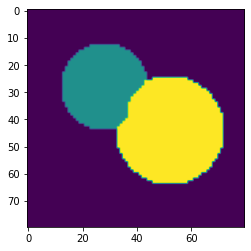

In [ ]:
plt.imshow(labels)

In [ ]:
distance.shape

(80, 80)

In [ ]:
image.shape

(80, 80)

In [ ]:
from skimage.color import rgba2rgb
from skimage import data
img_rgba = data.logo()
img_rgb = rgba2rgb(img_rgba)

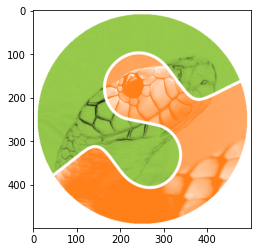

In [ ]:
plt.imshow(img_rgba)

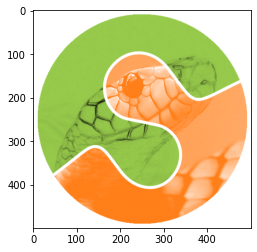

In [ ]:
plt.imshow(img_rgb)

In [ ]:
img_rgb.shape,img_rgba.shape

((500, 500, 3), (500, 500, 4))

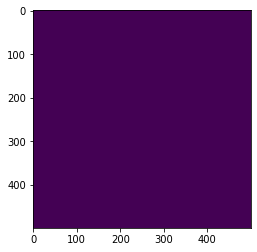

In [ ]:
plt.imshow(img_rgba[:,:,3])

In [ ]:
img_rgba.dtype

dtype('uint8')

In [ ]:
from skimage import util
img = data.camera()
inverted_img = util.invert(img)

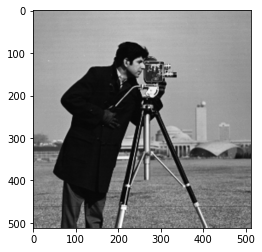

In [ ]:
plt.imshow(img,cmap='gray')

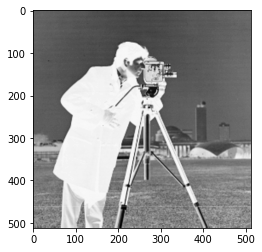

In [ ]:
plt.imshow(inverted_img,cmap='gray')

In [ ]:
img[0,0]

156

In [ ]:
inverted_img[0,0]

99

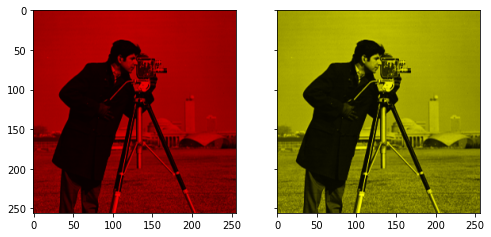

In [ ]:
import matplotlib.pyplot as plt
from skimage import data
from skimage import color
from skimage import img_as_float

grayscale_image = img_as_float(data.camera()[::2, ::2])
image = color.gray2rgb(grayscale_image)

red_multiplier = [1, 0, 0]
yellow_multiplier = [1, 1, 0]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4),
                               sharex=True, sharey=True)
ax1.imshow(red_multiplier * image)
ax2.imshow(yellow_multiplier * image)

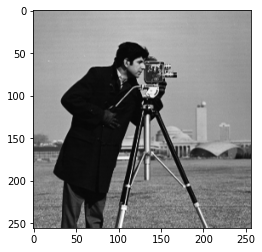

In [ ]:
plt.imshow(image)

In [ ]:
np.all(image[:,:,0] == grayscale_image)

True

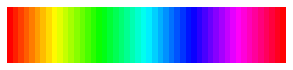

In [ ]:
import numpy as np

hue_gradient = np.linspace(0, 1)
hsv = np.ones(shape=(1, len(hue_gradient), 3), dtype=float)
hsv[:, :, 0] = hue_gradient

all_hues = color.hsv2rgb(hsv)

fig, ax = plt.subplots(figsize=(5, 2))
# Set image extent so hues go from 0 to 1 and the image is a nice aspect ratio.
ax.imshow(all_hues, extent=(0, 1, 0, 0.2))
ax.set_axis_off()

In [ ]:
hue_gradient

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

In [ ]:
hsv.shape

(1, 50, 3)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.filters import sobel
from skimage.measure import label
from skimage.segmentation import slic, join_segmentations, watershed
from skimage.color import label2rgb
from skimage import data

# coins = data.coins()

s1 = io.imread('s1.jpg')[:,:,0]
threshold_value = filters.threshold_otsu(s1)

coins = s1>threshold_value

In [ ]:
s1 = io.imread('s1.jpg')[:,:,0]
threshold_value = filters.threshold_otsu(s1)
s1.shape

(1056, 846)

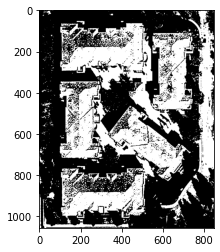

In [ ]:
plt.imshow(s1>threshold_value+20,cmap='gray')

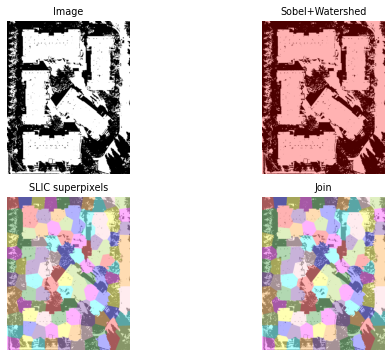

<Figure size 1080x1080 with 0 Axes>

In [ ]:
# Make segmentation using edge-detection and watershed.
edges = sobel(img_adapteq )

# Identify some background and foreground pixels from the intensity values.
# These pixels are used as seeds for watershed.
markers = np.zeros_like(coins)
foreground, background = 1, 2
markers[coins < 30.0] = background
markers[coins > 150.0] = foreground

ws = watershed(edges, markers)
seg1 = label(ws == foreground)

# Make segmentation using SLIC superpixels.
seg2 = slic(coins, n_segments=117, max_iter=160, sigma=2, compactness=1.5,
            multichannel=False)

# Combine the two.
segj = join_segmentations(seg1, seg2)

# Show the segmentations.
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(9, 5),
                         sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(coins, cmap='gray')
ax[0].set_title('Image')

color1 = label2rgb(seg1, image=coins, bg_label=0)
ax[1].imshow(color1)
ax[1].set_title('Sobel+Watershed')

color2 = label2rgb(seg2, image=coins, image_alpha=0.5, bg_label=-1)
ax[2].imshow(color2)
ax[2].set_title('SLIC superpixels')

color3 = label2rgb(segj, image=coins, image_alpha=0.5, bg_label=-1)
ax[3].imshow(color3)
ax[3].set_title('Join')

for a in ax:
    a.axis('off')
plt.figure(figsize=(15,15))
fig.tight_layout()
plt.show()

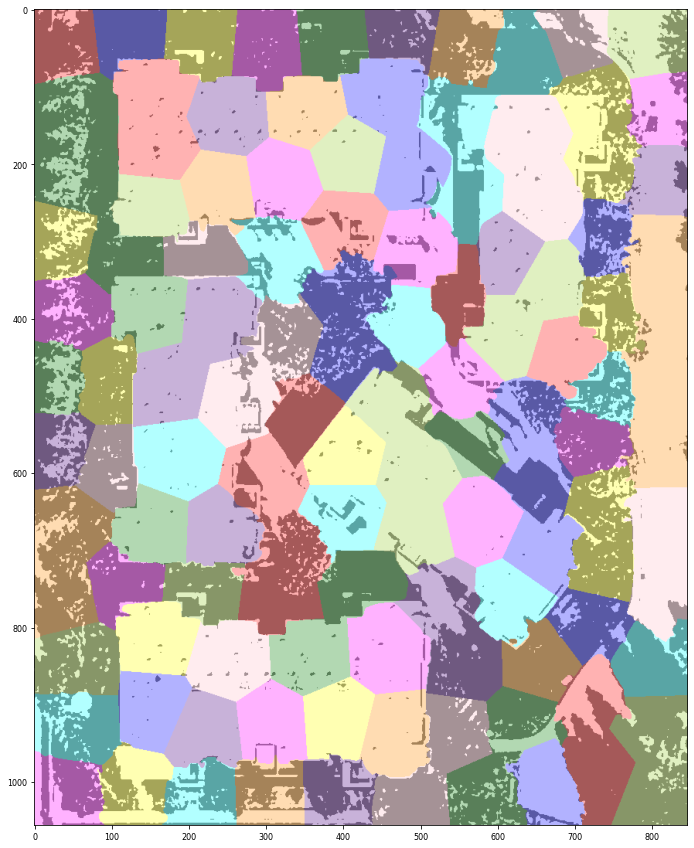

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(color2)

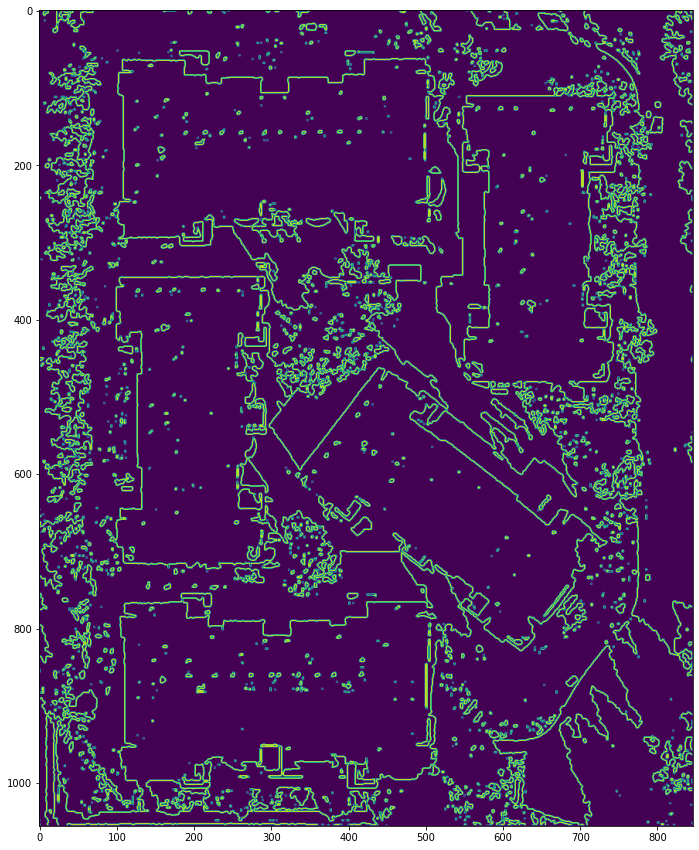

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(edges)

In [ ]:
s1.shape

(1056, 846)

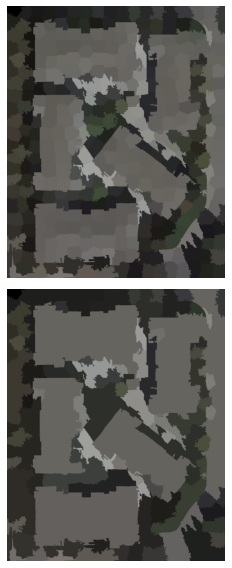

In [ ]:
from skimage import data, segmentation, color
from skimage.future import graph
from matplotlib import pyplot as plt


img = io.imread('s1.jpg') #data.coffee()

labels1 = segmentation.slic(img, compactness=30, n_segments=400)
out1 = color.label2rgb(labels1, img, kind='avg', bg_label=0)

g = graph.rag_mean_color(img, labels1)
labels2 = graph.cut_threshold(labels1, g, 20)
out2 = color.label2rgb(labels2, img, kind='avg', bg_label=0)

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True,
                       figsize=(6, 8))

ax[0].imshow(out1)
ax[1].imshow(out2)

for a in ax:
    a.axis('off')

plt.tight_layout()

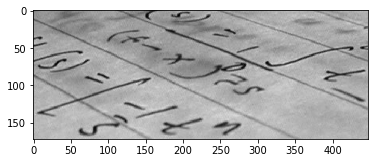

In [ ]:
plt.imshow(text,cmap='gray')

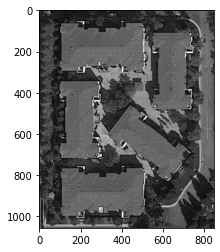

In [ ]:
from skimage import exposure
text = s1 #data.text()
text.min(), text.max()

better_contrast = exposure.rescale_intensity(text)
better_contrast.min(), better_contrast.max()
plt.imshow(better_contrast,cmap='gray')

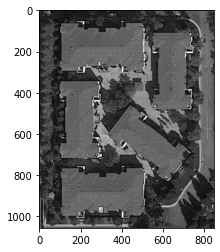

In [ ]:
plt.imshow(s1,cmap='gray')

In [ ]:
moon = data.moon()
v_min, v_max = np.percentile(moon, (0.2, 99.8))
v_min, v_max

better_contrast = exposure.rescale_intensity(
                                    moon, in_range=(v_min, v_max))

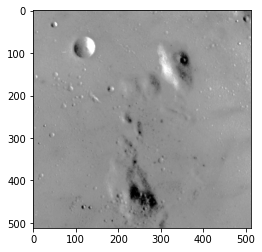

In [ ]:
plt.imshow(better_contrast,cmap='gray')

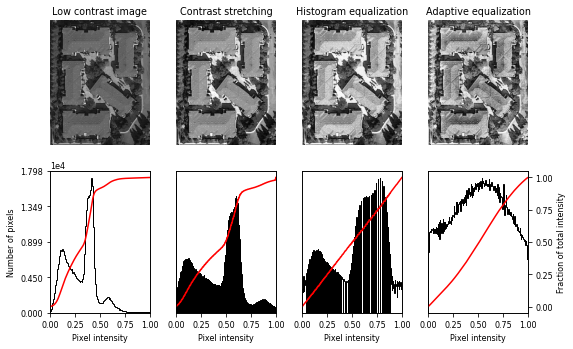

<Figure size 1080x1080 with 0 Axes>

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure


matplotlib.rcParams['font.size'] = 8


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = s1 # data.moon()

# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.figure(figsize=(15,15))
plt.show()